<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [69]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [70]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [71]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [72]:
df = pd.read_csv(file_name)
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11398 non-null  int64  
 1   MainBranch              11398 non-null  object 
 2   Hobbyist                11398 non-null  object 
 3   OpenSourcer             11398 non-null  object 
 4   OpenSource              11317 non-null  object 
 5   Employment              11398 non-null  object 
 6   Country                 11398 non-null  object 
 7   Student                 11347 non-null  object 
 8   EdLevel                 11286 non-null  object 
 9   UndergradMajor          10661 non-null  object 
 10  EduOther                11234 non-null  object 
 11  OrgSize                 11302 non-null  object 
 12  DevType                 11333 non-null  object 
 13  YearsCode               11389 non-null  object 
 14  Age1stCode              11385 non-null

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [26]:
%pip install seaborn
import seaborn as sns 
import matplotlib as mpl
%matplotlib inline 
import matplotlib.pyplot as plt

<ipython-input-58-b0f2d98cca39>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ConvertedComp'], hist=False)


<AxesSubplot:xlabel='ConvertedComp', ylabel='Density'>

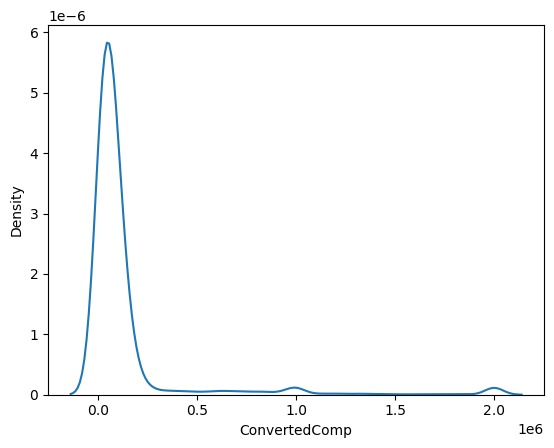

In [58]:
# your code goes here
sns.distplot(df['ConvertedComp'], hist=False)


Plot the histogram for the column `ConvertedComp`.


<AxesSubplot:xlabel='ConvertedComp', ylabel='Count'>

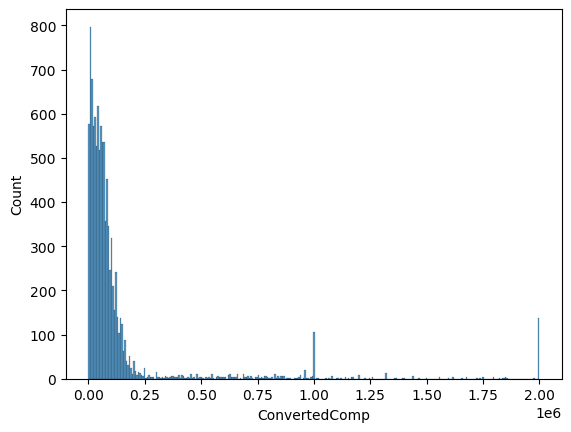

In [31]:
# your code goes here
sns.histplot(df['ConvertedComp'] )

What is the median of the column `ConvertedComp`?


In [33]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [35]:
# your code goes here
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [42]:
# your code goes here
df_new = df.groupby(by=['Gender']).median()
df_new
#57708.0

<ipython-input-42-64f3ec05d53c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_new = df.groupby(by=['Gender']).median()


,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Gender,,,,,,
Man,12521.5,65000.0,57744.0,40.0,4.0,29.0
"Man;Non-binary, genderqueer, or gender non-conforming",13609.0,65000.0,59520.0,40.0,3.5,28.0
"Non-binary, genderqueer, or gender non-conforming",11807.0,66000.0,67142.0,40.0,4.0,27.0
Woman,11973.0,65000.0,57708.0,40.0,4.0,28.0
Woman;Man,14844.0,30000.0,21648.0,40.0,6.0,29.5
"Woman;Man;Non-binary, genderqueer, or gender non-conforming",12228.0,42350.0,30244.0,60.0,4.0,26.5
"Woman;Non-binary, genderqueer, or gender non-conforming",10285.0,78500.0,65535.5,40.0,3.0,26.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [43]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

In [47]:
df['Age'].median()

29.0

Plot a histogram of the column `Age`.


<AxesSubplot:xlabel='Age', ylabel='Count'>

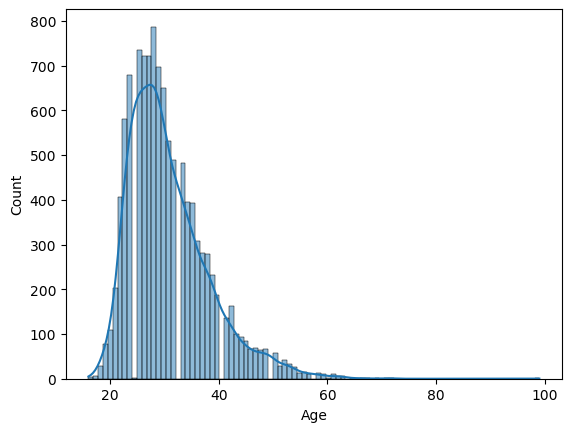

In [46]:
# your code goes here
sns.histplot(df['Age'],kde = True)

## Outliers


### Finding outliers


In [93]:
df['ConvertedComp'].median()

57745.0

Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:ylabel='ConvertedComp'>

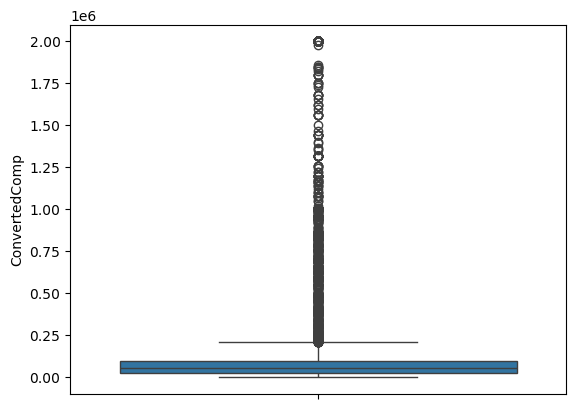

In [51]:
# your code goes here
sns.boxplot(df['ConvertedComp'])

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [74]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3  = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
IQR

73132.0

Find out the upper and lower bounds.


In [75]:
# your code goes here
# 计算上下界
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"四分位数范围（IQR）为：{IQR}")
print(f"下界为：{lower_bound}")
print(f"上界为：{upper_bound}")


四分位数范围（IQR）为：73132.0
下界为：-82830.0
上界为：209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [78]:
# your code goes here
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
print(f"ConvertedComp 列中的异常值数量为：{len(outliers)}")

# if not outliers.empty:
#     print("\n异常值为：")
#     print(outliers)

ConvertedComp 列中的异常值数量为：879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [91]:
# your code goes here
df_filtered = df[(df['ConvertedComp'] <= upper_bound) & (df['ConvertedComp'] >= lower_bound)]
print(f"Median of ConvertedComp column is {df_filtered['ConvertedComp'].median()}")
print(f"Mean of ConvertedComp column is {df_filtered['ConvertedComp'].mean()}")

Median of ConvertedComp column is 52704.0
Mean of ConvertedComp column is 59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [90]:
# your code goes here
df.corr()['Age']

<ipython-input-90-bead62608471>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Age']


Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
